## Práctica 3 - ALGORITMOS GENÉTICOS
### Grupo 1461
### Pareja 1: Alejandro Alcalá y Pablo Díez


In [1]:
from ClasificadorAG import ClasificadorAlgoritmoGenetico
from Datos import Datos
from EstrategiaParticionado import ValidacionSimple

### Apartado 1
En este apartado se van a explicar las decisiones de diseño que se han ido tomando a la hora de realizar la práctica.

#### 1.1 Población
En primer lugar, vamos a explicar como se genera la población que posteriormente irá evolucionando para dar con la mejor solución posible al problema propuesto. 
Esta población esta compuesta por individuos, y cada individuo es un diccionario con 3 claves, el fitness, inicialmente 0, el número de reglas, que forma parte del constructor de la clase y por último una lista con las reglas que lo definen.

El tamaño de la población también forma parte de la instanciación de la clase del clasificador, pudiendo modificarse si se considera oportuno.

En los siguientes apartados profundizaremos sobre el fitness y la generación de las reglas.

#### 1.2. Generación de las reglas
En segundo lugar, es necesario explicar como hemos generado las reglas de las que esta compuesto el individuo, para ello, vamos a hacerlo a través de un ejemplo:
                                   
                                       Regla = 0 0 1 | 1 0 0 | 0 1 0 | 1
                                   
Las tres primeras partes de la regla, son los atributos, y están tienen el mismo número de bits que posibles valores toma ese atributo en el dataset, es decir, en este caso, si los 3 atributos que forman la clase tuvieron los valores <i>x,y,z</i> el primero representaría la <i>x</i>, el segundo la <i>z</i> y el último representaría <i>y</i>. 

El último bit representa la clase, como siempre vamos a clasificar casos binarios, con un único bit sería suficiente. 

Otro ejemplo para el caso en el que los atributos también sean binarios sería el siguiente:
                                       
                                       Regla = 0 1 | 1 0 | 1 0 | 1
                                       
Los individuos estarán compuestos por una lista de <i>n</i> reglas, inicializadas en el instante inicial de forma aleatoria.

#### 1.3. Mecanismo de cruce
Hemos implementado el cruce en un punto, un mecanismo que nos parecía suficiente y también sencillo que tiene un buen rendimiento en la práctica. 

El cruce no puede producirse <i>inter-regla</i>, es decir, cuando se cruzan, se cruzan completas. Para ello, generamos un punto aleatorio entre 0 y el número total de reglas que tenemos y creamos los dos nuevos individuos.

A parte de eso, hay una variable importante a tener en cuenta, la <b>Probabilidad de cruce</b>, esto indica el porcentaje de individuos de la siguiente generación que serán obtenidos por cruce, es decir, teniendo una población de 100 individuos, con una Probabilidad de cruce de 0,85, en los 100 individuos de la siguiente generación, 85 vendrían del cruce. Este proceso descrito es el que seguimos para cruzar los individuos.

#### 1.4. Selección de progenitores
Este paso es muy importante y previo al cruce. Permite seleccionar los progenitores que se utilizarán para cruzarse y generar nuevos individuos. 

Hemos implementado el mecanismo de la <i>Ruleta Rusa</i>, que elige los progenitores aleatoriamente, de forma ponderada en base a su fitness, o lo que es lo mismo, si un individuo tiene más fitness será elegido más veces que uno que tenga menos. Para hacer esto hemos utilizado una función de NumPy, <b>np.random.choice()</b> que genera una lista de indices aleatorios en función de la ponderación de la lista que recibe por parámetro. 

#### 1.5. Mecanismo de mutación
Para mutar un individuo, lo primero es tener en cuenta cuantos individuos de la poblacion hay que mutar, para ello utilizamos la Probabilidad de mutación, que si fuera 0.1 y tuvieramos 100 indiviudos en la población, generaría 10 individuos mutados. Para elegir los 10 individuos se haría aleatoriamente de la población y mutaríamos esos 10. 

Para mutar esos 10 individuos realizamos una mutación a nivel de reglas, es decir, mutamos una regla de todas las que tiene el individuo, elegida de forma aleatoria. Para mutar esa regla generamos una regla aleatoria nueva. 

#### 1.6. Cálculo del fitness
Para calcular el fitness implementamos un mecanismo que se basa en calcular el % de aciertos de cada individuo para todos los datos de entrenamiento. 

Para ver si un individuo acierta un dato se sigue el siguiente proceso:
1. Comparamos el dato de entrenamiento con cada regla y nos quedamos con la clase de aquellas que se activan.
2. Entre todas las reglas que se activan elegimos como predicción final la clase mayoritaria de entre todas las predichas.
3. Una vez tenemos la predicción del individuo, comparamos esa predicción con la clase real del dato, si es la misma, el individuo acierta, en caso contrario no.

Hemos definido una variable  <b>numAtributosCompare</b> en el constructor de la clase que permite modificar el número de atributos que tienen que coincidir entre la regla y el dato para que esta se active, por defecto está definida como 1. En el caso de ejemplos 1 y 2 sería válido, ya que solo tenemos atributos y buscar la activación de uno de ellos es razonable, pero en el caso de tic-tac-toe, que tenemos 9 atributos, nos parecia más razonable que tuvieran que ser iguales un minimo de 4 atributos para que se activara la regla y para ello tomamos esta decisión.

#### 1.7. Clasificación
La clasificación consiste en llevar a cabo el mismo proceso que en el cálculo del fitness pero en lugar de para toda la población, unicamente para el mejor individuo y cambiando los datos de la partición de entrenamiento por los de test.

#### 1.8. Elitismo
Esta es la última parte que falta para completar la generación de individuos para la siguiente generación. Para ello, elegimos los mejores individuos en función de la proporción de elitismo, definida al instancia el clasificador, más concretamente si el elitismo corresponde al 0,05 de 100 individuos, los 5 con mejor fitness pasaran directamente a la nueva población.

### Apartado 2

En este apartado aparecen las ejecuciones para todos los conjuntos de datos, con distinto número de individuos, generaciones y reglas por individuo.

#### Código Algoritmo Genético

In [2]:
from Clasificador import Clasificador
import numpy as np
from matplotlib import pyplot as plt
import random

class ClasificadorAlgoritmoGenetico(Clasificador):

    def __init__(self, numGeneraciones, numIndividuos, numReglas = 8, probabilidadMutacion = 0.1, elitismo = 0.05, probabilidadCruce = 0.85, numAtributosCompare = 1):

        self.numGeneraciones = numGeneraciones
        self.numIndividuos = numIndividuos
        self.numReglas = numReglas
        self.probabilidadMutacion = probabilidadMutacion
        self.elitismo = elitismo
        self.probabilidadCruce = probabilidadCruce
        self.listaFitnessMedios = []
        self.listaFitnessChampion = []
        self.numAtributosCompare = numAtributosCompare

        super().__init__()


    def entrenamiento(self, dataset, datosTrain):

        """Algoritmo de entrenamiento del Algoritmo genetico. Recibe por parametro los datosTrain y el dataset sobre el que se ejecuta."""
        # Guardamos el numero de atributos del dato
        self.numAtributos = len(dataset.listaDicts) - 1

        # Generamos la poblacion inicial
        self.generar_poblacion(dataset)

        for numGen in range(self.numGeneraciones):

            # Inicializamos todos los fitness a 0.
            for individuo in self.poblacion:
                individuo['fitness'] = 0
            
            # Calculo del fitness de la poblacion
            self.fitness(datosTrain)

            # Guardamos los fitness medios de cada poblacion
            suma_fitness = 0
            for individuo in self.poblacion:
                suma_fitness += individuo['fitness']

            fitness_medio_generacion = suma_fitness/len(self.poblacion)
            self.listaFitnessMedios.append(fitness_medio_generacion)

            # Guardamos el fitness del mejor individuo de cada poblacion
            self.listaFitnessChampion.append(self.champion()['fitness'])

            # Elites que pasan directamente a a la siguiente poblacion
            elites, n_elites = self.seleccion_elitismo()

            # Operador cruce
            poblacion_cruzada = self.operador_cruce()

            #  Operador mutacion sobre la nueva poblacion
            individuos_mutados = self.operador_mutacion()     
                
            self.poblacion = []
            for i in range(len(poblacion_cruzada)):
                self.poblacion.append(poblacion_cruzada[i])
            
            for i in range(len(individuos_mutados)):
                self.poblacion.append(individuos_mutados[i])

            for i in range(len(elites)):
                self.poblacion.append(elites[i])

        #Calculamos el mejor individuo final
        self.fitness(datosTrain)
        champion = self.champion()
        self.listaFitnessChampion.append(champion['fitness'])

        suma_fitness = 0
        for individuo in self.poblacion:
            suma_fitness += individuo['fitness']

        fitness_medio_generacion = suma_fitness / len(self.poblacion)
        self.listaFitnessMedios.append(fitness_medio_generacion)

        print("Mejor individuo final: ", champion)


        return champion

    def clasifica(self, datosTest, champion):
        """Utilizando el mejor individuo tras terminar el numero de generaciones del algoritmo, clasifica los datos Test."""
        
        datTest = self.datos_transformados[datosTest]
        aciertos = 0

        # Recorremos los datos de test
        for dato in datTest:
            # Array que guardara las clases que se predicen para cada dato para posteriormente votar
            clases_predichas = []

            # Recorremos todas las reglas del mejor individuo
            for regla in champion['reglas']:
                pred = -1
        
                # Vemos si coinciden los atributos
                res = np.bitwise_and(dato.astype(int), regla.astype(int))
                num_unos = (res[:-1] == 1).sum()
                
                # En caso de que todos los atributos coincidan, guardamos la clase que predice esa regla.
                if num_unos >= self.numAtributosCompare:
                    clases_predichas.append(regla[-1])

            # En el caso en el que se haya predicho algo, vemos cual es la clase mayoritaria y la devolvemos
            if len(clases_predichas) != 0:
                if clases_predichas.count(1) > clases_predichas.count(0):
                    pred = 1
                elif clases_predichas.count(1) < clases_predichas.count(0):
                    pred = 0
                else:
                    pred = np.random.randint(0,2)

            # Si la clase mayoritaria acierta, se suma uno
            if pred == dato[-1]:
                aciertos += 1

        # Calculamos el error y lo devolvemos
        error = (len(datTest) - aciertos) / len(datosTest)

        return error, 1 - error


    def transforma_dataset(self, dataset):
        """ Transforma el dataset a la misma notacion que van a utilizar las reglas del algoritmo genético"""

        # Creamos un array donde van a insertarse los datos transformados
        self.datos_transformados = np.array([])

        # Convertimos los elementos al mismo tipo que las reglas
        for dato in dataset.datos:
            array_convertido = np.zeros(self.longitud_regla - 1)
            for i in range(len(dato)-1):
                posicion_bit_uno = self.listaDictsIntervalos[i]['final'] - int(dato[i])
                array_convertido[posicion_bit_uno] = 1

            array_convertido = np.append(array_convertido, dato[i+1])

            self.datos_transformados = np.append(self.datos_transformados, array_convertido)

        self.datos_transformados = self.datos_transformados.reshape(dataset.numDatos, self.longitud_regla)

    def calculo_intervalos(self, dataset):

        # Calculamos la longitud de la regla que se va a generar y los intervalos dentro la regla que hacen referencia a cada atributo.
        self.listaDictsIntervalos = np.array([])

        # Hacemos un random del numero de reglas, pero todos los individuos tendran el mismo
        self.longitud_regla = 0
        for i in range(len(dataset.listaDicts) - 1):
            dict ={}
            dict['inicio'] = self.longitud_regla
            dict['final'] = self.longitud_regla + len(dataset.listaDicts[i]) -1
            self.listaDictsIntervalos = np.append(self.listaDictsIntervalos,dict)

            self.longitud_regla += len(dataset.listaDicts[i])

        self.longitud_regla += 1

        return self.longitud_regla

    def generar_poblacion(self, dataset):

        # Lista de diccionarios que va a almacenar los individuos
        self.poblacion = np.array([])

        self.calculo_intervalos(dataset)

        # Generamos los individuos que formaran la poblacion inicial
        for num_generacion in range(self.numIndividuos):

            # Diccionario que forma el individuo, con su num_reglas, la lista de reglas que lo componen y el fitness
            individuo = {}
            individuo['fitness'] = 0
            individuo['num_reglas'] = self.numReglas
            individuo['reglas'] = []
            for regla in range(self.numReglas):
                individuo['reglas'].append(self.generar_regla())

            self.poblacion = np.append(self.poblacion, individuo)

    def generar_regla(self):

        # Generamos una regla de longitud calculada anteriormente
        regla = np.zeros(self.longitud_regla -1)

        # Caso atributos(n bits)
        for i in range(len(self.listaDictsIntervalos)):
            aleat = np.random.randint(self.listaDictsIntervalos[i]['inicio'], self.listaDictsIntervalos[i]['final']+1)
            regla[aleat] = 1

            # Caso clase(1 bit)
        aleat = np.random.randint(0, 2)
        regla = np.append(regla, aleat)

        return regla

    def operador_mutacion(self):
        """ Solo se mutara una regla, de manera aleatoria, en caso de que la probabilidad que obtenemos sea menor del umbral."""

        n_mutaciones = round((self.probabilidadMutacion * self.numIndividuos))

        individuos_mutacion = random.sample(list(self.poblacion), n_mutaciones)
        
        for individuo in individuos_mutacion:
            # Si hay que mutar, generamos un numero aleat. para ver que regla mutamos.
            regla_mutacion = np.random.randint(0,individuo['num_reglas'])
            
            # Generamos una regla aleatoria nueva y la cambiamos por la anterior
            individuo['reglas'][regla_mutacion] = self.generar_regla()

        return individuos_mutacion

    def operador_cruce(self):
        """ Funcion que genera el cruce de dos individuos en caso deque supere la probabilidad definida."""

        # Seleccionamos los progenitores
        progenitores = self.seleccion_progenitores()

        n_cruces = round((self.probabilidadCruce * self.numIndividuos))
        
        # Creamos la poblacion nueva
        poblacion_nueva = []
        
        for i in range(0, len(progenitores), 2):

            # Inicializamos los individuos nuevos que vamos a crear
            individuo_1 = {}
            individuo_2 = {}
            individuo_1['fitness'] = 0
            individuo_1['num_reglas'] = self.numReglas
            individuo_2['fitness'] = 0
            individuo_2['num_reglas'] = self.numReglas            
            
            # Calculamos un punto aleatorio entre las reglas del primer y el segundo progenitor
            punto_cruce = np.random.randint(0, self.numReglas)
            
            individuo_1['reglas'] = progenitores[i]['reglas'][:punto_cruce]
            individuo_1['reglas'] = individuo_1['reglas'] + progenitores[i+1]['reglas'][punto_cruce:]
            individuo_2['reglas'] = progenitores[i+1]['reglas'][:punto_cruce]
            individuo_2['reglas'] = individuo_2['reglas'] + progenitores[i]['reglas'][punto_cruce:]
            
        # En caso contrario los padres son los nuevos individuos
            
            poblacion_nueva.append(individuo_1)
            poblacion_nueva.append(individuo_2)
            
        return poblacion_nueva[:n_cruces]

    def seleccion_elitismo(self):
        """Se selecciona el porcentaje marcada entre los mejores fitness de todos los individuos que formaran
        parte de la siguiente generacion de forma directa."""

        # Ordenamos la poblacion y calculamos el numero de elites en funcion de la probabilidad de elitismo.
        self.poblacion = sorted(self.poblacion, key=lambda k: k['fitness'], reverse=True)
        num_elites = round((self.elitismo * self.numIndividuos))

        # Nos guardamos los 5 mejores de la poblacion y los añadimos a la poblacion nueva
        individuos = self.poblacion[:num_elites]

        # Guardamos en una nueva lista que devolvemos los mejores
        elites = []
        for i in range(num_elites):
            elites.append(individuos[i])

        return elites, num_elites

    def champion(self):
        """ Devuelve el mejor individiuo de la poblacion"""

        # Ordenamos la poblacion en funcion del fitness
        self.poblacion = sorted(self.poblacion, key=lambda k: k['fitness'], reverse=True)

        champion = self.poblacion[0]
        return champion

    def seleccion_progenitores(self):
        """ Esta funcion genera una lista con los progenitores que se van a utilizar para el cruce."""

        # Lista de progenitores
        progenitores = []

        # Creamos un array con las probabilidades de cada individuo.
        lista_fitness_ponderados = []

        suma_fitness = 0
        # Media del fitness de la poblacion
        for individuo in range(len(self.poblacion)):
            suma_fitness += self.poblacion[individuo]['fitness']

        # Probabilidad de ser elegido de cada individuo
        for individuo in range(len(self.poblacion)):
            if suma_fitness == 0:
                lista_fitness_ponderados.append(0)
            else:
                fitness_ponderado = self.poblacion[individuo]['fitness']/suma_fitness
                lista_fitness_ponderados.append(fitness_ponderado)

        # Generamos la lista de progenitores con la funcion de numpy random_choice
        indices_progenitores = np.random.choice(len(self.poblacion),len(self.poblacion), lista_fitness_ponderados)

        # Generamos un array con los diccionarios que representan cada individuo
        for i in indices_progenitores:
            progenitores.append(self.poblacion[i])

        return progenitores


    def fitness(self, datosTrain):
        """ Funcion que calcula el fitness de un individuo de la poblacion"""

        datTrain = self.datos_transformados[datosTrain]
    
        # Para cada individuo recorremos todos los datos
        for individuo in self.poblacion:
            
            # Contador que cuenta el numero de aciertos del individuo respecto a todos los datos, que es el fitness
            aciertos = 0
            for dato in datTrain:
                clases_predichas = []
                pred = -1

                for regla in individuo['reglas']:
                    # And logico de los atributos
                    res = np.bitwise_and(dato.astype(int), regla.astype(int))
                    num_unos = (res[:-1] == 1).sum()

                    # Si coinciden todos guardamos la clase de las reglas que se activan
                    if num_unos >= self.numAtributosCompare:
                        clases_predichas.append(regla[-1])

                # Predecimos la clase mayoritaria
                if len(clases_predichas) != 0:
                    if clases_predichas.count(1) > clases_predichas.count(0):
                        pred = 1
                    elif clases_predichas.count(1) < clases_predichas.count(0):
                        pred = 0
                    else:

                        # Este caso se desestima, por incongruencias de las reglas
                        pred = -1

                    # Si la prediccion coincide con la clase del dato, acertamos
                if pred == dato [-1]:
                    aciertos += 1

            # Calculo del fitness para cada individuo.
            individuo['fitness'] = aciertos / len(datTrain)

    def graficas_fitness(self):
        """ Funcion que genera las graficas del fitness medio de la poblacion y la evolucion del fitness del mejor individuo."""

        plt.plot(self.listaFitnessChampion, c='red', label = 'fitness champion')
        plt.plot(self.listaFitnessMedios, c='blue', label = 'fitness medio poblacion')
        plt.xlabel("Num. generaciones")
        plt.ylabel("Fitness")
        plt.legend(loc='best')
        plt.show()


In [3]:
# Cargamos el dataset ejemplo 1 y creamos las particiones
dataset_e1 = Datos("../Datasets/ejemplo1.data") 
vs_e1 = ValidacionSimple(0.7)
vs_e1.creaParticiones(dataset_e1)

# Cargamos el dataset ejemplo 2 y creamos las particiones
dataset_e2 = Datos("../Datasets/ejemplo1.data")
vs_e2 = ValidacionSimple(0.7)
vs_e2.creaParticiones(dataset_e2)

# Cargamos el dataset tic-tac-toe y creamos las particiones
dataset_tic_tac_toe = Datos("../Datasets/tic-tac-toe.data")
vs_tic_tac_toe = ValidacionSimple(0.7)
vs_tic_tac_toe.creaParticiones(dataset_tic_tac_toe)

#### Clasificacion ejemplo 1

In [4]:
clf_e1_1 = ClasificadorAlgoritmoGenetico(100, 100)

clf_e1_1.calculo_intervalos(dataset_e1)
clf_e1_1.transforma_dataset(dataset_e1)

champion = clf_e1_1.entrenamiento(dataset_e1, vs_e1.particiones[0].indicesTrain)
error,acierto = clf_e1_1.clasifica(vs_e1.particiones[0].indicesTest,champion)
print(" ------ ERROR EJEMPLO 1 - 100 GENERACIONES - 100 INDIVIDUOS -- 4 REGLAS/INDIVIDUO ------ ")
print("Error: ", error)

Mejor individuo final:  {'fitness': 1.0, 'num_reglas': 8, 'reglas': [array([0., 1., 1., 0., 1.]), array([1., 0., 1., 0., 1.]), array([0., 1., 0., 1., 0.]), array([1., 0., 1., 0., 0.]), array([0., 1., 0., 1., 0.]), array([1., 0., 1., 0., 0.]), array([1., 0., 0., 1., 1.]), array([1., 0., 0., 1., 1.])]}
 ------ ERROR EJEMPLO 1 - 100 GENERACIONES - 100 INDIVIDUOS -- 4 REGLAS/INDIVIDUO ------ 
Error:  0.0


In [5]:
clf_e1_2 = ClasificadorAlgoritmoGenetico(100, 100)

clf_e1_2.calculo_intervalos(dataset_e1)
clf_e1_2.transforma_dataset(dataset_e1)

champion = clf_e1_2.entrenamiento(dataset_e1, vs_e1.particiones[0].indicesTrain)
error,acierto = clf_e1_2.clasifica(vs_e1.particiones[0].indicesTest,champion)
print(" ------ ERROR EJEMPLO 1 - 300 GENERACIONES - 100 INDIVIDUOS -- 4 REGLAS/INDIVIDUO ------ ")
print("Error: ", error)

Mejor individuo final:  {'fitness': 1.0, 'num_reglas': 8, 'reglas': [array([0., 1., 1., 0., 1.]), array([1., 0., 1., 0., 0.]), array([0., 1., 1., 0., 0.]), array([1., 0., 0., 1., 1.]), array([0., 1., 0., 1., 0.]), array([1., 0., 1., 0., 0.]), array([1., 0., 0., 1., 1.]), array([0., 1., 1., 0., 1.])]}
 ------ ERROR EJEMPLO 1 - 300 GENERACIONES - 100 INDIVIDUOS -- 4 REGLAS/INDIVIDUO ------ 
Error:  0.0


In [6]:
clf_e1_3 = ClasificadorAlgoritmoGenetico(100, 200)

clf_e1_3.calculo_intervalos(dataset_e1)
clf_e1_3.transforma_dataset(dataset_e1)

champion = clf_e1_3.entrenamiento(dataset_e1, vs_e1.particiones[0].indicesTrain)
error,acierto = clf_e1_3.clasifica(vs_e1.particiones[0].indicesTest,champion)
print(" ------ ERROR EJEMPLO 1 - 100 GENERACIONES - 200 INDIVIDUOS -- 4 REGLAS/INDIVIDUO ------ ")
print("Error: ", error)

Mejor individuo final:  {'fitness': 1.0, 'num_reglas': 8, 'reglas': [array([0., 1., 0., 1., 0.]), array([0., 1., 1., 0., 1.]), array([1., 0., 0., 1., 1.]), array([1., 0., 1., 0., 0.]), array([1., 0., 1., 0., 0.]), array([1., 0., 1., 0., 0.]), array([1., 0., 0., 1., 1.]), array([1., 0., 0., 1., 1.])]}
 ------ ERROR EJEMPLO 1 - 100 GENERACIONES - 200 INDIVIDUOS -- 4 REGLAS/INDIVIDUO ------ 
Error:  0.0


#### Clasificacion ejemplo 2

In [7]:
clf_e2_1 = ClasificadorAlgoritmoGenetico(100, 100)

clf_e2_1.calculo_intervalos(dataset_e2)
clf_e2_1.transforma_dataset(dataset_e2)

champion = clf_e2_1.entrenamiento(dataset_e2, vs_e2.particiones[0].indicesTrain)
error,acierto = clf_e2_1.clasifica(vs_e2.particiones[0].indicesTest,champion)
print(" ------ ERROR EJEMPLO 2 - 100 GENERACIONES - 100 INDIVIDUOS -- 4 REGLAS/INDIVIDUO ------ ")
print("Error: ", error)

Mejor individuo final:  {'fitness': 1.0, 'num_reglas': 8, 'reglas': [array([1., 0., 1., 0., 0.]), array([0., 1., 1., 0., 1.]), array([0., 1., 1., 0., 1.]), array([1., 0., 1., 0., 0.]), array([1., 0., 1., 0., 0.]), array([0., 1., 0., 1., 0.]), array([1., 0., 0., 1., 1.]), array([1., 0., 1., 0., 1.])]}
 ------ ERROR EJEMPLO 2 - 100 GENERACIONES - 100 INDIVIDUOS -- 4 REGLAS/INDIVIDUO ------ 
Error:  0.0


In [8]:
clf_e2_2 = ClasificadorAlgoritmoGenetico(300, 100)

clf_e2_2.calculo_intervalos(dataset_e2)
clf_e2_2.transforma_dataset(dataset_e2)

champion = clf_e2_2.entrenamiento(dataset_e2, vs_e2.particiones[0].indicesTrain)
error,acierto = clf_e2_2.clasifica(vs_e2.particiones[0].indicesTest,champion)
print(" ------ ERROR EJEMPLO 2 - 300 GENERACIONES - 100 INDIVIDUOS -- 4 REGLAS/INDIVIDUO ------ ")
print("Error: ", error)

Mejor individuo final:  {'fitness': 1.0, 'num_reglas': 8, 'reglas': [array([1., 0., 0., 1., 1.]), array([1., 0., 1., 0., 0.]), array([0., 1., 0., 1., 0.]), array([0., 1., 1., 0., 1.]), array([1., 0., 1., 0., 0.]), array([0., 1., 0., 1., 0.]), array([1., 0., 0., 1., 1.]), array([0., 1., 1., 0., 1.])]}
 ------ ERROR EJEMPLO 2 - 300 GENERACIONES - 100 INDIVIDUOS -- 4 REGLAS/INDIVIDUO ------ 
Error:  0.0


In [9]:
clf_e2_3 = ClasificadorAlgoritmoGenetico(100, 200)

clf_e2_3.calculo_intervalos(dataset_e2)
clf_e2_3.transforma_dataset(dataset_e2)

champion = clf_e2_3.entrenamiento(dataset_e2, vs_e2.particiones[0].indicesTrain)
error,acierto = clf_e2_3.clasifica(vs_e2.particiones[0].indicesTest,champion)
print(" ------ ERROR EJEMPLO 2 - 100 GENERACIONES - 200 INDIVIDUOS -- 4 REGLAS/INDIVIDUO ------ ")
print("Error: ", error)

Mejor individuo final:  {'fitness': 1.0, 'num_reglas': 8, 'reglas': [array([0., 1., 1., 0., 1.]), array([0., 1., 0., 1., 0.]), array([1., 0., 1., 0., 0.]), array([0., 1., 1., 0., 1.]), array([1., 0., 0., 1., 1.]), array([0., 1., 0., 1., 0.]), array([1., 0., 0., 1., 1.]), array([1., 0., 0., 1., 0.])]}
 ------ ERROR EJEMPLO 2 - 100 GENERACIONES - 200 INDIVIDUOS -- 4 REGLAS/INDIVIDUO ------ 
Error:  0.0


#### Clasificación Tic-Tac-Toe

In [10]:
clf_tictac1 = ClasificadorAlgoritmoGenetico(100, 100, numReglas=4, numAtributosCompare = 5)

clf_tictac1.calculo_intervalos(dataset_tic_tac_toe)
clf_tictac1.transforma_dataset(dataset_tic_tac_toe)

champion = clf_tictac1.entrenamiento(dataset_tic_tac_toe, vs_tic_tac_toe.particiones[0].indicesTrain)
error,acierto = clf_tictac1.clasifica(vs_tic_tac_toe.particiones[0].indicesTest,champion)
print(" ------ ERROR EJEMPLO TIC-TAC - 100 GENERACIONES - 100 INDIVIDUOS -- 4 REGLAS/INDIVIDUO ------ ")
print("Error: ", error)

Mejor individuo final:  {'fitness': 0.49402985074626865, 'num_reglas': 4, 'reglas': [array([1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1.]), array([1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1.]), array([0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1.]), array([1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1.])]}
 ------ ERROR EJEMPLO TIC-TAC - 100 GENERACIONES - 100 INDIVIDUOS -- 4 REGLAS/INDIVIDUO ------ 
Error:  0.5104166666666666


In [11]:
clf_tictac2 = ClasificadorAlgoritmoGenetico(100, 100, numReglas=8, numAtributosCompare = 5)

clf_tictac2.calculo_intervalos(dataset_tic_tac_toe)
clf_tictac2.transforma_dataset(dataset_tic_tac_toe)

champion = clf_tictac2.entrenamiento(dataset_tic_tac_toe, vs_tic_tac_toe.particiones[0].indicesTrain)
error,acierto = clf_tictac2.clasifica(vs_tic_tac_toe.particiones[0].indicesTest,champion)
print(" ------ ERROR EJEMPLO TIC-TAC - 100 GENERACIONES - 100 INDIVIDUOS -- 8 REGLAS/INDIVIDUO ------ ")
print("Error: ", error)

Mejor individuo final:  {'fitness': 0.6164179104477612, 'num_reglas': 8, 'reglas': [array([1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1.]), array([1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1.]), array([1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1.]), array([1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1.]), array([0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1.]), array([1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1.]), array([1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1.]), array([0., 0., 1., 0

In [12]:
clf_tictac3 = ClasificadorAlgoritmoGenetico(100, 100, numReglas=12, numAtributosCompare = 5)

clf_tictac3.calculo_intervalos(dataset_tic_tac_toe)
clf_tictac3.transforma_dataset(dataset_tic_tac_toe)

champion = clf_tictac3.entrenamiento(dataset_tic_tac_toe, vs_tic_tac_toe.particiones[0].indicesTrain)
error,acierto = clf_tictac3.clasifica(vs_tic_tac_toe.particiones[0].indicesTest,champion)
print(" ------ ERROR EJEMPLO TIC-TAC - 100 GENERACIONES - 100 INDIVIDUOS -- 12 REGLAS/INDIVIDUO ------ ")
print("Error: ", error)

Mejor individuo final:  {'fitness': 0.6283582089552239, 'num_reglas': 12, 'reglas': [array([0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1.]), array([0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1.]), array([1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1.]), array([0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1.]), array([0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1.]), array([0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1.]), array([1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1.]), array([1., 0., 0., 

In [13]:
clf_tictac4 = ClasificadorAlgoritmoGenetico(300, 100, numReglas=8, numAtributosCompare = 5)

clf_tictac4.calculo_intervalos(dataset_tic_tac_toe)
clf_tictac4.transforma_dataset(dataset_tic_tac_toe)

champion = clf_tictac4.entrenamiento(dataset_tic_tac_toe, vs_tic_tac_toe.particiones[0].indicesTrain)
error,acierto = clf_tictac4.clasifica(vs_tic_tac_toe.particiones[0].indicesTest,champion)
print(" ------ ERROR EJEMPLO TIC-TAC - 300 GENERACIONES - 100 INDIVIDUOS -- 8 REGLAS/INDIVIDUO ------ ")
print("Error: ", error)

Mejor individuo final:  {'fitness': 0.6134328358208955, 'num_reglas': 8, 'reglas': [array([0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1.]), array([1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1.]), array([0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1.]), array([1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1.]), array([1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.]), array([1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1.]), array([0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1.]), array([0., 0., 1., 1

In [14]:
clf_tictac5 = ClasificadorAlgoritmoGenetico(100, 200, numReglas=8, numAtributosCompare = 5)

clf_tictac5.calculo_intervalos(dataset_tic_tac_toe)
clf_tictac5.transforma_dataset(dataset_tic_tac_toe)

champion = clf_tictac5.entrenamiento(dataset_tic_tac_toe, vs_tic_tac_toe.particiones[0].indicesTrain)
error,acierto = clf_tictac5.clasifica(vs_tic_tac_toe.particiones[0].indicesTest,champion)
print(" ------ ERROR EJEMPLO TIC-TAC - 100 GENERACIONES - 200 INDIVIDUOS -- 8 REGLAS/INDIVIDUO ------ ")
print("Error: ", error)

Mejor individuo final:  {'fitness': 0.5925373134328358, 'num_reglas': 8, 'reglas': [array([1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1.]), array([0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1.]), array([0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1.]), array([1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1.]), array([1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1.]), array([1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0.,
       1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1.]), array([0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1.]), array([1., 0., 0., 0

In [15]:
clf_tictac6 = ClasificadorAlgoritmoGenetico(300, 200, numReglas=8, numAtributosCompare = 5)

clf_tictac6.calculo_intervalos(dataset_tic_tac_toe)
clf_tictac6.transforma_dataset(dataset_tic_tac_toe)

champion = clf_tictac6.entrenamiento(dataset_tic_tac_toe, vs_tic_tac_toe.particiones[0].indicesTrain)
error,acierto = clf_tictac6.clasifica(vs_tic_tac_toe.particiones[0].indicesTest,champion)
print(" ------ ERROR EJEMPLO TIC-TAC - 300 GENERACIONES - 200 INDIVIDUOS -- 8 REGLAS/INDIVIDUO ------ ")
print("Error: ", error)

Mejor individuo final:  {'fitness': 0.6134328358208955, 'num_reglas': 8, 'reglas': [array([1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1.]), array([1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1.,
       0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1.]), array([0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1.]), array([1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1.]), array([0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1.]), array([0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1.]), array([0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1.]), array([1., 0., 0., 0

### Apartado 3 - Análisis de resultados

### Apartado 4 - Evolución en forma de gráfica

 ----- GRAFICA EJEMPLO 1 - 100 GENERACIONES - 100 INDIVIDUOS -- 4 REGLAS/INDIVIDUO ------ 


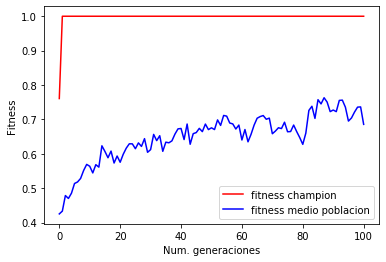

In [16]:
print(" ----- GRAFICA EJEMPLO 1 - 100 GENERACIONES - 100 INDIVIDUOS -- 4 REGLAS/INDIVIDUO ------ ")
clf_e1_1.graficas_fitness()

 ----- GRAFICA EJEMPLO 1 - 300 GENERACIONES - 100 INDIVIDUOS -- 4 REGLAS/INDIVIDUO ------ 


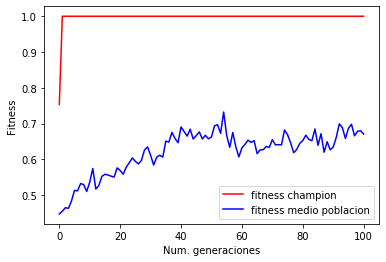

In [17]:
print(" ----- GRAFICA EJEMPLO 1 - 300 GENERACIONES - 100 INDIVIDUOS -- 4 REGLAS/INDIVIDUO ------ ")
clf_e1_2.graficas_fitness()

 ----- GRAFICA EJEMPLO 1 - 100 GENERACIONES - 200 INDIVIDUOS -- 4 REGLAS/INDIVIDUO ------ 


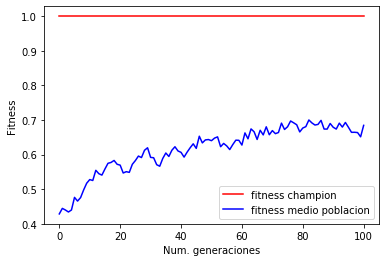

In [18]:
print(" ----- GRAFICA EJEMPLO 1 - 100 GENERACIONES - 200 INDIVIDUOS -- 4 REGLAS/INDIVIDUO ------ ")
clf_e1_3.graficas_fitness()

 ----- GRAFICA EJEMPLO 2 - 100 GENERACIONES - 100 INDIVIDUOS -- 4 REGLAS/INDIVIDUO ------ 


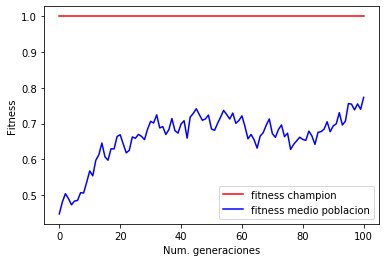

In [19]:
print(" ----- GRAFICA EJEMPLO 2 - 100 GENERACIONES - 100 INDIVIDUOS -- 4 REGLAS/INDIVIDUO ------ ")
clf_e2_1.graficas_fitness()

 ----- GRAFICA EJEMPLO 2 - 100 GENERACIONES - 100 INDIVIDUOS -- 4 REGLAS/INDIVIDUO ------ 


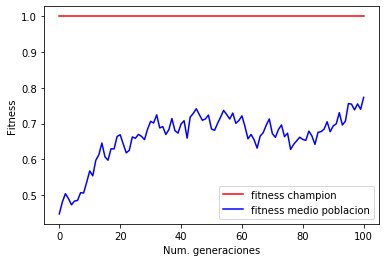

In [20]:
print(" ----- GRAFICA EJEMPLO 2 - 100 GENERACIONES - 100 INDIVIDUOS -- 4 REGLAS/INDIVIDUO ------ ")
clf_e2_1.graficas_fitness()

 ----- GRAFICA EJEMPLO 3 - 100 GENERACIONES - 100 INDIVIDUOS -- 4 REGLAS/INDIVIDUO ------ 


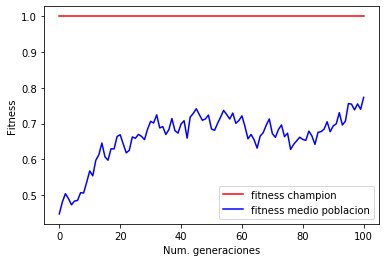

In [21]:
print(" ----- GRAFICA EJEMPLO 3 - 100 GENERACIONES - 100 INDIVIDUOS -- 4 REGLAS/INDIVIDUO ------ ")
clf_e2_1.graficas_fitness()

 ----- GRAFICA TIC-TAC - 100 GENERACIONES - 100 INDIVIDUOS -- 4 REGLAS/INDIVIDUO ------ 


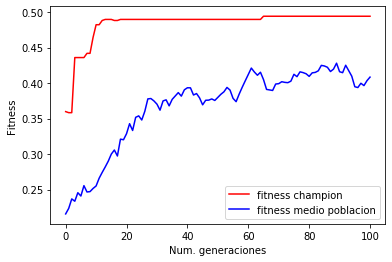

In [22]:
print(" ----- GRAFICA TIC-TAC - 100 GENERACIONES - 100 INDIVIDUOS -- 4 REGLAS/INDIVIDUO ------ ")
clf_tictac1.graficas_fitness()

 ----- GRAFICA TIC-TAC - 100 GENERACIONES - 100 INDIVIDUOS -- 8 REGLAS/INDIVIDUO ------ 


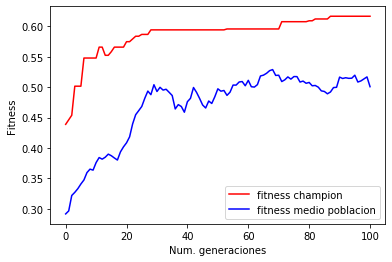

In [23]:
print(" ----- GRAFICA TIC-TAC - 100 GENERACIONES - 100 INDIVIDUOS -- 8 REGLAS/INDIVIDUO ------ ")
clf_tictac2.graficas_fitness()

 ----- GRAFICA TIC-TAC - 100 GENERACIONES - 100 INDIVIDUOS -- 12 REGLAS/INDIVIDUO ------ 


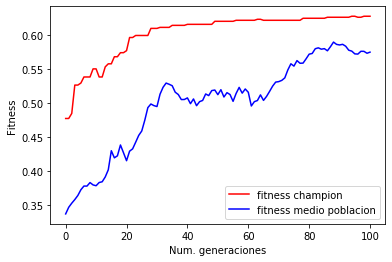

In [24]:
print(" ----- GRAFICA TIC-TAC - 100 GENERACIONES - 100 INDIVIDUOS -- 12 REGLAS/INDIVIDUO ------ ")
clf_tictac3.graficas_fitness()

 ----- GRAFICA TIC-TAC - 300 GENERACIONES - 100 INDIVIDUOS -- 8 REGLAS/INDIVIDUO ------ 


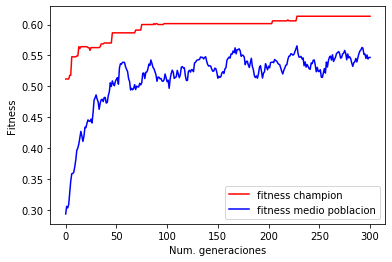

In [25]:
print(" ----- GRAFICA TIC-TAC - 300 GENERACIONES - 100 INDIVIDUOS -- 8 REGLAS/INDIVIDUO ------ ")
clf_tictac4.graficas_fitness()

 ----- GRAFICA TIC-TAC - 100 GENERACIONES - 200 INDIVIDUOS -- 8 REGLAS/INDIVIDUO ------ 


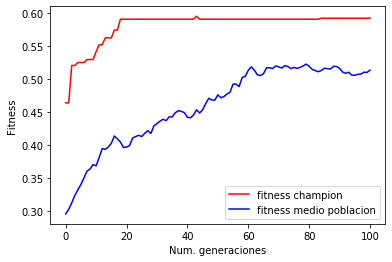

In [26]:
print(" ----- GRAFICA TIC-TAC - 100 GENERACIONES - 200 INDIVIDUOS -- 8 REGLAS/INDIVIDUO ------ ")
clf_tictac5.graficas_fitness()

 ----- GRAFICA TIC-TAC - 300 GENERACIONES - 200 INDIVIDUOS -- 8 REGLAS/INDIVIDUO ------ 


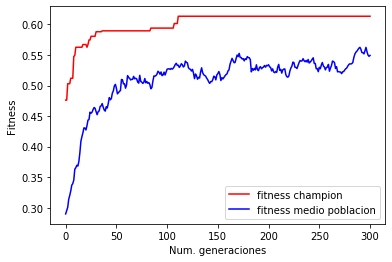

In [27]:
print(" ----- GRAFICA TIC-TAC - 300 GENERACIONES - 200 INDIVIDUOS -- 8 REGLAS/INDIVIDUO ------ ")
clf_tictac6.graficas_fitness()